In [53]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.9.1
2.9.0


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

# Transfer learning

<br>

<img src="Grafika/transfer_learning.png" width="550">

**Transfer learning** (transfer "wiedzy") - wykorzystanie nauczonych przez kogoś sieci do naszego problemu. Możliwe dzięki temu, że cechy wykrywane przez sieci w głębokich warstwach mogą być uniwersalne i przydatne w różnych problemach.

### VGG16

In [55]:
from keras.applications import VGG16, InceptionV3

base_model = VGG16(weights='imagenet', include_top=False)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### InceptionV3

In [56]:
inc = InceptionV3()
inc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_384 (Conv2D)            (None, 149, 149, 32  864         ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_384 (Batch  (None, 149, 149, 32  96         ['conv2d_384[0][0]']             
 Normalization)                 )                                                      

# Zad
Trzeba nadać wymiar wejści anaszej sieci
```python
h,w = 32, 32
```

In [57]:
h, w = 32, 32
model = VGG16(weights='imagenet', include_top=False, input_shape=(h, w, 3))

In [58]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [59]:
len(model.layers)

19

# Zad 
Zbudujmy siec z 
* VGG16 dla wejścia h,w = 32, 32
* Flatten
* Dense
* Dense

In [60]:
h, w = 32, 32
model = VGG16(weights='imagenet', include_top=False, input_shape=(h, w, 3))

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(4, activation='sigmoid'))

model_transfer = Sequential()
model_transfer.add(model)
model_transfer.add(top_model)

model_transfer.layers[0].trainable = False

model_transfer.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 sequential_12 (Sequential)  (None, 4)                 132356    
                                                                 
Total params: 14,847,044
Trainable params: 132,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [61]:
# model.summary()
# top_model.summary()

In [62]:
from keras.datasets import cifar10
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train < nb_classes)[0]][:n_samples], y_train[np.where(y_train < nb_classes)[0]][
                                                                           :n_samples]
X_test, y_test = X_test[np.where(y_test < nb_classes)[0]], y_test[np.where(y_test < nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train, return_counts=True))
print(X_train[0].shape)

# normalize inputs from 0-255 to 0.0-1.0

# X_train = X_train/255
# X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
(32, 32, 3)


(32, 32, 3)

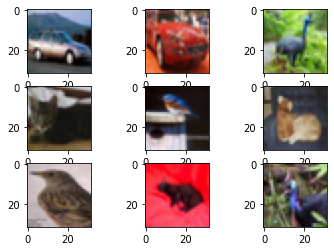

In [63]:
# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
plt.show()

# Zad
Naucz model z

* Transfer Learning
* Image Augmentation


In [64]:
from keras.preprocessing.image import ImageDataGenerator

nb_validation_samples = 200
nb_train_samples = 50
epochs = 50
batch_size = 10

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=45,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow(X_train,
                                     )

validation_generator = test_datagen.flow(X_test, )

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.callbacks import History

history_1 = History()
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_test.shape[1:], padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, (2, 2), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1, activation="softmax"))
model.summary()

early_stopping = EarlyStopping(patience=30, monitor="val_loss")
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])
model.fit(X_train, y_train, validation_split=0.25, epochs=10, callbacks=[early_stopping, history_1])
model.evaluate(X_test, y_test)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_478 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_478 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_478 (Activation)  (None, 32, 32, 32)       0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_479 (Conv2D)         (None, 16, 16, 16)      

ValueError: in user code:

    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/hania/PycharmProjects/PSI_13/venv/lib/python3.10/site-packages/keras/backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 4) and (None, 1) are incompatible


In [ ]:
plt.plot(history_1.history['categorical_accuracy'], label="tarina Conv Layer=2 A")
plt.plot(history_1.history['val_categorical_accuracy'], label="test Conv Layer=2 A")

plt.legend()
plt.show()